# Practica 1 (Regresión lineal)
### Aprendizaje automático y big data
##### _Alberto García Doménech - Pablo Daurell Marina_    
---

### Parte 1 (Regresión lineal con una variable)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [9]:
def carga_csv(file_name):
    """carga el fichero csv especificado y lo
 devuelve en un array de numpy
    """
    valores = pd.read_csv(file_name, header=None).values
    # suponemos que siempre trabajaremos con float
    return valores.astype(float)

Cargamos los datos sobre los que vamos a aplicar la regresión lineal:   
_(beneficios de una compañía en distintas ciudades en base a su población)_

In [10]:
datos1 = carga_csv('ex1data1.csv')

X = datos1[:, :-1]
np.shape(X)         # (97, 1)

Y = datos1[:, -1]
np.shape(Y)         # (97,)
m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

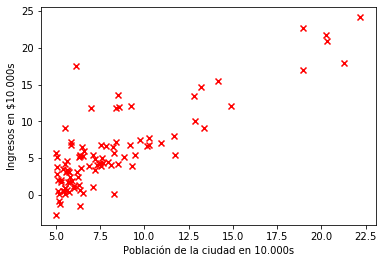

In [11]:
plt.scatter(X[:,-1], Y, c='r', marker='x')
plt.xlabel('Población de la ciudad en 10.000s')
plt.ylabel('Ingresos en $10.000s')
plt.show()

Para llevar a cabo la regresión lineal vamos a aplicar el método de **descenso del gradiente** para ir minimizando el error de la recta propuesta por la regresión en cada iteración.
Para ello usamos la función ```coste``` que calcula el error cometido y la función ```descenso_gradiente``` que calcula unos nuevos parámetros para la recta que minimicen el error.

In [12]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

def descenso_gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta, coste(X, Y, NuevaTheta)

La función ```make_data``` nos ayudará a dibujar gráficas para el coste de la regresión en cada instante.

In [13]:
def make_data(t0_range, t1_range, X, Y):
    """Genera las matrices X,Y,Z para generar un plot en 3D
    """
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    # Theta0 y Theta1 tienen las misma dimensiones, de forma que
    # cogiendo un elemento de cada uno se generan las coordenadas x,y
    # de todos los puntos de la rejilla
    
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

Vamos a calcular la regresión lineal correspondiente aplicando el método de descenso del gradiente.

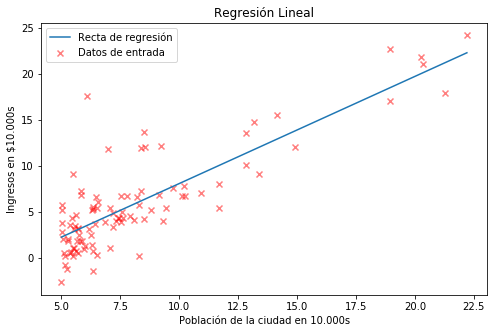

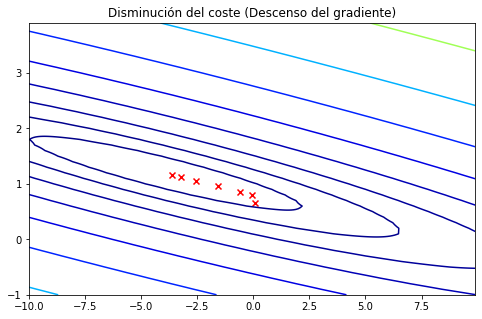

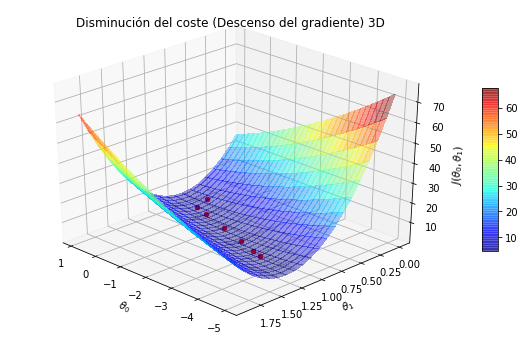

In [19]:
# Inicializamos Theta0 y Theta1
Theta = np.array([0.0,0.0])
# Tomamos una alpha con un valor bajo para no dar grandes saltos al buscar el minimo
alpha = 0.01

# Vamos a mostrar solo ciertos estados de las graficas
mostrar = [1,20,100,300,600,1000,1500]

## Generamos las matrices para dibujar la grafica
# Datos para dibujar la gráfica de contornos
data_contour = make_data([-10, 10], [-1, 4], X, Y)
# Datos para dibujar la gráfica 3D
data_3D = make_data([-5, 1], [0, 2], X, Y)

plt.figure(1, figsize=(8,5))
plt.scatter(X[:,-1],Y, c='r', marker='x',alpha=0.5,label="Datos de entrada")
plt.title('Regresión Lineal')
plt.xlabel('Población de la ciudad en 10.000s')
plt.ylabel('Ingresos en $10.000s')

plt.figure(2, figsize=(8,5))
plt.title('Disminución del coste (Descenso del gradiente)')
plt.contour(data_contour[0], data_contour[1], data_contour[2], np.logspace(-2, 3, 20), cmap=cm.jet)

fig = plt.figure(3, figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(data_3D[0], data_3D[1], data_3D[2], cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.4)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta_0, \theta_1)$')
ax.view_init(30, 135)

# Realizamos el método de descenso del gradiente
for i in range(1500):
    # Calculamos la nueva Theta que minimize el error cometido
    Theta, cost = descenso_gradiente(X, Y, Theta, alpha)
    
    # Generamos la recta de nuestra regresión lineal con los valores de Theta actuales
    x = np.linspace(min(X[:,-1]), max(X[:,-1]))
    y = Theta[0] + Theta[1]*x
    
    # Dibujamos las gráficas adecuadas (regresión lineal, coste2D y coste 3D)
    if i+1 in mostrar:
        #### Dibujar coste con contornos 2D ####
        plt.figure(2)
        plt.scatter(Theta[0], Theta[1], marker='x', c='r')
        
        #### Dibujar coste en 3D ####
        plt.figure(3)
        ax.scatter(Theta[0], Theta[1], cost, c='r')
        

plt.figure(1)
plt.plot(x,y, label='Recta de regresión')
plt.legend()

plt.figure(3)
plt.title('Disminución del coste (Descenso del gradiente) 3D')
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

En la primera gráfica vemos la recta resultante de calcular la regresión lineal.   
En las dos gráficas posteriores vemos como el coste va disminuyendo hacia valores minimos:   
- En la segunda gráfica vemos como los puntos se van acercando al centro de las curvas de nivel que representan el coste en función de Theta0 y Theta1
- En la última gráfica vemos el coste en función de Theta0 y Theta1 en 3D y como los puntos se van acercando al coste mínimo.

---
### Parte 2 (Regresión lineal con varias variable)

Cargamos los datos sobre los que vamos a aplicar la regresión:   
_(Precio de las casas vendidas en Portland en función de su tamaño y el número de habitaciones)_

In [27]:
datos2 = carga_csv('ex1data2.csv')

X = datos2[:, :-1]
np.shape(X)         # (47, 2)

Y = datos2[:, -1]
np.shape(Y)         # (47,)
m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

Para aplicar el método de **descenso del gradiente** en este caso vamos a normalizar los datos para que todos los atributos estén en un rango similar de valores:   
(Si no normalizamos, los valores del tamaño del piso son mucho más grandes que los del número de habitaciones).

In [23]:
def normalize(X):
    '''Normaliza los datos de la matriz X
    restandoles su media y dividiendolos por la desviacion estandar'''
    mu = np.mean(X, axis=0)
    X_mean = X - mu
    sigma = np.std(X, axis=0)
    X_norm = X_mean / sigma
    return X_norm, mu, sigma

In [26]:
datos_norm, mu, sigma = normalize(datos2)

X_norm = datos_norm[:, :-1]
np.shape(X_norm)         # (47, 2)

Y_norm = datos_norm[:, -1]
np.shape(Y_norm)         # (47,)
m = np.shape(X_norm)[0]
n = np.shape(X_norm)[1]

# añadimos una columna de 1's a la X
X_norm = np.hstack([np.ones([m, 1]), X_norm])

Aplicamos el descenso del gradiente con distintos variables de alpha (tasa de aprendizaje) y vemos como varía el coste en cada caso:

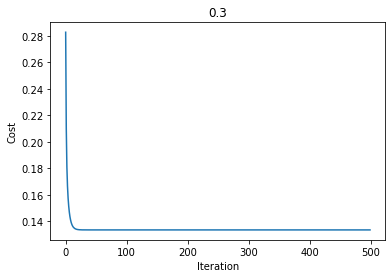

Final cost: 0.13352749098554287
Final Theta: [-9.21248893e-17  8.84765988e-01 -5.31788197e-02]


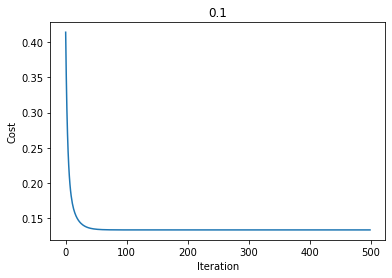

Final cost: 0.13352749098554287
Final Theta: [-6.99794832e-17  8.84765988e-01 -5.31788196e-02]


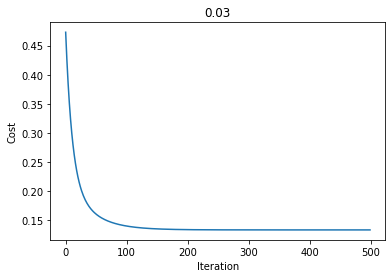

Final cost: 0.1335276548510075
Final Theta: [-7.23003218e-17  8.84155747e-01 -5.25685789e-02]


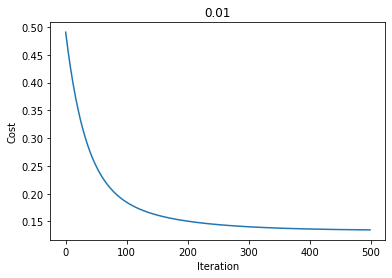

Final cost: 0.13470384837630947
Final Theta: [-9.4929974e-17  8.3290228e-01 -1.6355787e-03]


In [52]:
for alpha in [0.3, 0.1, 0.03, 0.01]:
    Theta = np.zeros(np.shape(X_norm)[1])
    costes = []
    plt.figure(1)
    plt.title(alpha)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    
    for i in range(500):
        Theta, cost = descenso_gradiente(X_norm, Y_norm, Theta, alpha)
        costes.append(cost)
    
    plt.plot(costes)
    plt.show()
    print('Final cost:', cost)
    print('Final Theta:', Theta)

- Vemos que cuanto más pequeña es alpha más se tarda en llegar a minimizar el coste, esto se debe a que la variación de Theta en cada iteración es mucho menor cuanto menor sea aplha.

Ahora vamos a calcular la regresión lineal con el método de la **ecuación normal** que, a diferencia del descenso del gradiente, obtiene los valores de Theta en un solo paso aplicando una ecuación.   
Para este método podremos usar los datos sin normalizar.

In [53]:
def normal_equation(X, Y):
    Aux1 = np.matmul(X.T, X)
    I = np.linalg.inv(Aux1)
    Aux2 = np.matmul(I, X.T)
    return np.matmul(Aux2, Y)

Calculamos la regresión lineal con ambos métodos:

In [58]:
### Descenso del gradiente
Theta1 = np.zeros(np.shape(X_norm)[1])
alpha = 0.1
for i in range(1500):
    Theta1, cost = descenso_gradiente(X_norm, Y_norm, Theta1, alpha)

In [55]:
### Ecuación normal
Theta2 = normal_equation(X, Y)

Por último comprobamos que al predecir nuevos individuos de nuestro conjunto de datos obtenemos el mismo resultado con ambos métodos.

In [66]:
## Datos para probar ambos modelos
casa = np.array([1650,3]) # Casa de 1650 pies cuadrados y 3 habitaciones

# Datos normalizados para modelo de descenso del gradiente
casa_norm = (casa - mu[:-1])
casa_norm = casa_norm / sigma[:-1]

# Probamos el descenso del gradiente y desnormalizamos el resultado
gradient_predict = np.matmul(np.append(np.array([1]),casa_norm), Theta1) * sigma[-1]
gradient_predict = gradient_predict + mu[-1]

# Probamos la ecuación normal
normal_predict = np.matmul(np.append(np.array([1]),casa), Theta2)

print('Precio de una casa con', casa[0], 'pies cuadrados y', casa[1], 'habitaciones:')
print('- Descenso del gradiente:', gradient_predict)
print('- Ecuación normal:', normal_predict)

Precio de una casa con 1650 pies cuadrados y 3 habitaciones:
- Descenso del gradiente: 293081.4643348962
- Ecuación normal: 293081.46433489426
